In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import warnings
warnings.filterwarnings('ignore') 

/kaggle/input/shampoo-saled-dataset/shampoo_sales.csv


### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### reading data

In [3]:
df = pd.read_csv("/kaggle/input/shampoo-saled-dataset/shampoo_sales.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


### converting date to datetime format

In [5]:
def parse_date(x):
    return datetime.strptime('200'+x, '%Y-%m')

df = pd.read_csv("/kaggle/input/shampoo-saled-dataset/shampoo_sales.csv",index_col=[0], parse_dates=[0], date_parser=parse_date)
df.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [6]:
df.tail()

,Sales
Month,
2003-08-01,407.6
2003-09-01,682.0
2003-10-01,475.3
2003-11-01,581.3
2003-12-01,646.9


### To analyse trend, seasonality in data

<Axes: xlabel='Month'>

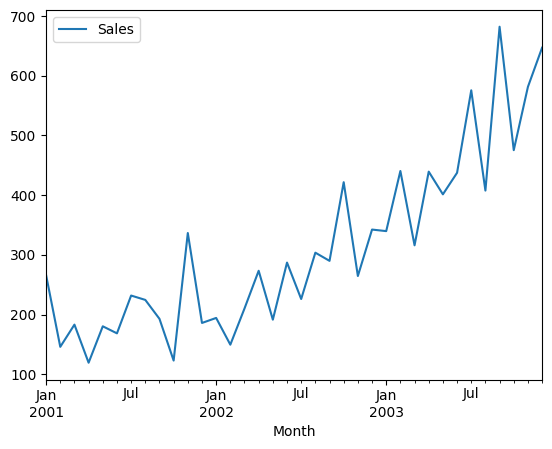

In [7]:
df.plot()

In [8]:
df1 = df.copy()

### Seasonal Decompose

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decom = seasonal_decompose(df, model='additive')

In [11]:
actual = decom.observed
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid

### Visualising seasonal decompose

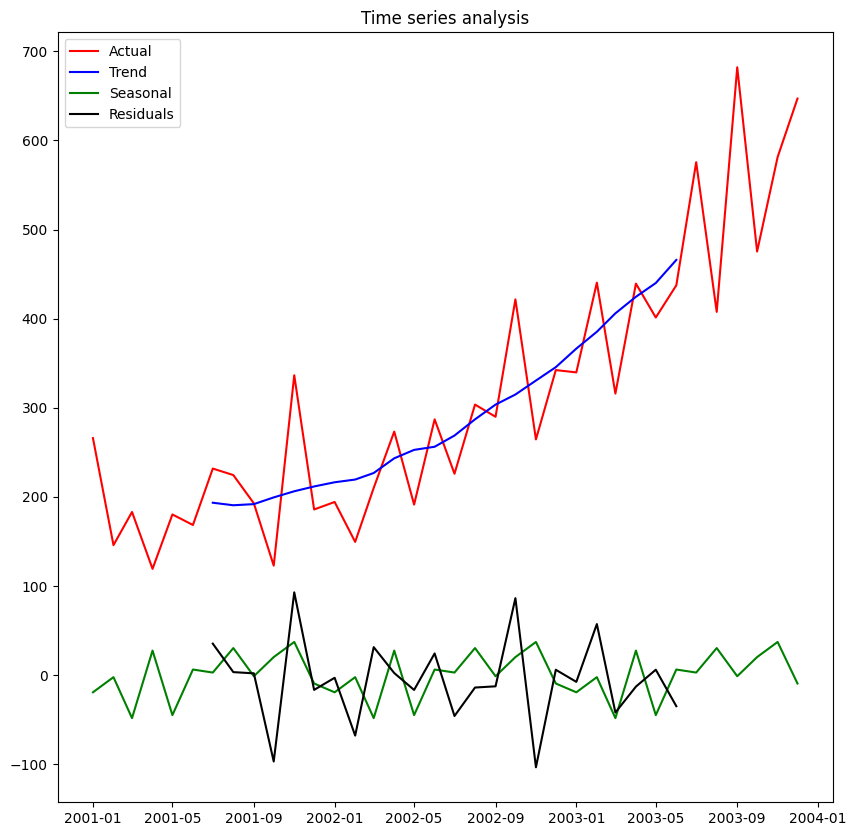

In [12]:
plt.figure(figsize=(10,10))
plt.plot(actual,color='red',label='Actual')
plt.plot(trend,color='blue', label='Trend')
plt.plot(seasonal,color='green', label='Seasonal')
plt.plot(residual, color='black', label='Residuals')
plt.legend()
plt.title("Time series analysis")
plt.show()

## Statistical test to check stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
# H0(Null Hypothesis) - Data is not stationary
# H1(Alternate Hypothesis) - Data is stationary

def adf_test(data):
    res = adfuller(data)
    print("RES : ",res)
    print("test_stat : ",res[0])
    print("p_val : ",res[1])
    if res[1]>0.05:
        print("H0 is accepted - data is not stationary")
    else:
        print("H1 is accepted - data is stationary")

In [15]:
adf_test(df1)

RES :  (3.06014208364118, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.9972644263031)
test_stat :  3.06014208364118
p_val :  1.0
H0 is accepted - data is not stationary


## Method to reduce stationarity
1. Differencing
2. Log Differencing
3. sqrt
4. square or cube, log etc

In [16]:
df1['lag1'] = df1['Sales'].shift(1)
df1['lag2'] = df1['Sales'].shift(2)
df1['Diff1'] = df1['Sales'].diff(1)
df1['Diff2'] = df1['Sales'].diff(2)
df1.head(10)

,Sales,lag1,lag2,Diff1,Diff2
Month,,,,,
2001-01-01,266.0,NaN,NaN,NaN,NaN
2001-02-01,145.9,266.0,NaN,-120.1,NaN
2001-03-01,183.1,145.9,266.0,37.2,-82.9
2001-04-01,119.3,183.1,145.9,-63.8,-26.6
2001-05-01,180.3,119.3,183.1,61.0,-2.8
2001-06-01,168.5,180.3,119.3,-11.8,49.2
2001-07-01,231.8,168.5,180.3,63.3,51.5
2001-08-01,224.5,231.8,168.5,-7.3,56.0
2001-09-01,192.8,224.5,231.8,-31.7,-39.0


In [17]:
# order of differencing = 1
adf_test(df['Sales'].diff(1).dropna())

RES :  (-7.249074055553856, 1.7998574141687034e-10, 1, 33, {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}, 275.32503579406307)
test_stat :  -7.249074055553856
p_val :  1.7998574141687034e-10
H1 is accepted - data is stationary


In [18]:
adf_test(np.log(df['Sales']))

RES :  (1.798463299383079, 0.9983459643719065, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, -20.938048906258615)
test_stat :  1.798463299383079
p_val :  0.9983459643719065
H0 is accepted - data is not stationary


In [19]:
adf_test(np.sqrt(df['Sales']))

RES :  (2.5804123807554853, 0.9990712745555809, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 94.84111839626254)
test_stat :  2.5804123807554853
p_val :  0.9990712745555809
H0 is accepted - data is not stationary


In [20]:
adf_test((df['Sales'])**(1/3))

RES :  (2.3667130282045235, 0.9989937736689773, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 24.57420524904807)
test_stat :  2.3667130282045235
p_val :  0.9989937736689773
H0 is accepted - data is not stationary


### Ploting acf and pacf to get p and q value

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

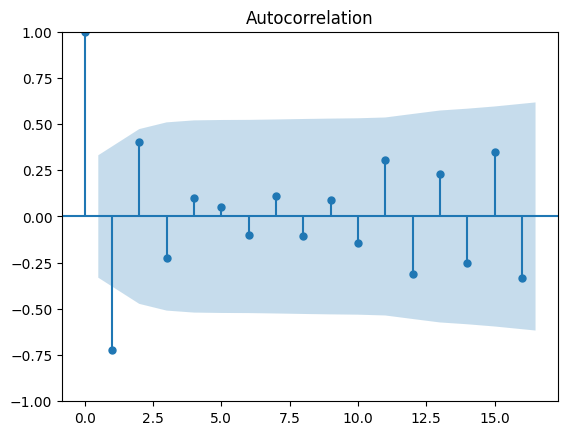

In [22]:
plot_acf(df['Sales'].diff(1).dropna())
plt.show()

# q = 1

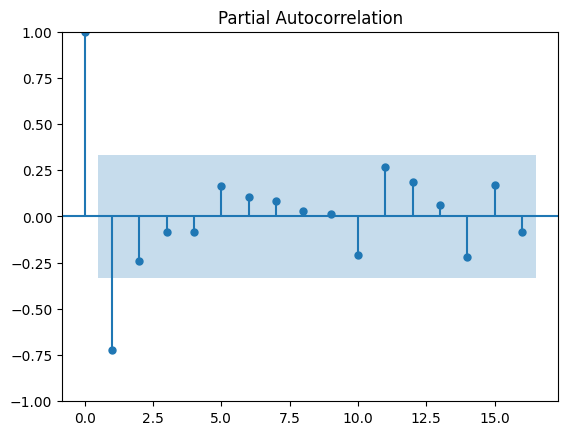

In [23]:
plot_pacf(df['Sales'].diff(1).dropna())
plt.show()

# p = 1

## Inference
p=1, q=1, d=1

In [24]:
df.tail()

,Sales
Month,
2003-08-01,407.6
2003-09-01,682.0
2003-10-01,475.3
2003-11-01,581.3
2003-12-01,646.9


In [25]:
print(df.shape)
df.head()

(36, 1)


,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [26]:
train = df.iloc[:28,:]
test = df.iloc[28:,:]
print(train.shape)
print(test.shape)

(28, 1)
(8, 1)


In [27]:
train.tail()

,Sales
Month,
2002-12-01,342.3
2003-01-01,339.7
2003-02-01,440.4
2003-03-01,315.9
2003-04-01,439.3


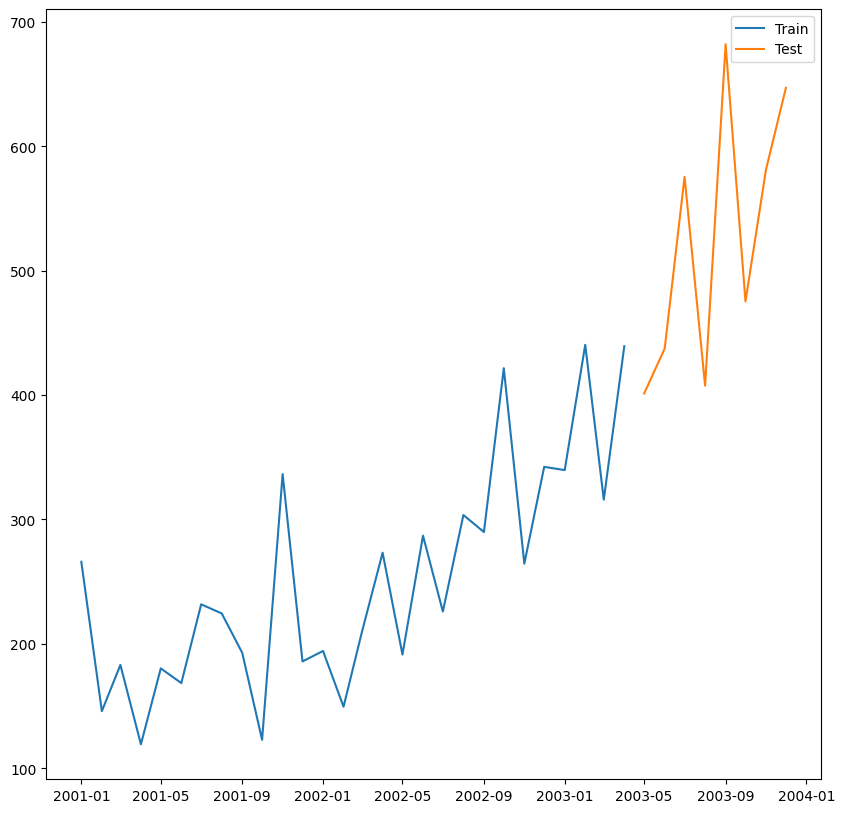

In [28]:
plt.figure(figsize=(10,10))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.legend()
plt.show()

In [29]:
def plot_res(train,test,pred):
    plt.figure(figsize=(10,10))
    plt.plot(train, label="Train")
    plt.plot(test, label="Test")
    plt.plot(pred, label="Forecast")
    plt.legend()
    plt.show()

## Implementing ARIMA Model

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
def eval_model(test, pred):
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test,pred)
    print("MSE : ",mse)
    print("RMSE : ",rmse)
    print("MAE : ",mae)

## ARIMA(p=1,d=0,q=0) - AR Model

In [32]:
#  oredr = (p,d,q)
m1 = ARIMA(train, order=(1,0,0))
ar_m1 = m1.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
print(test.shape)

(8, 1)


In [34]:
fcast_m1 = ar_m1.forecast(8)
fcast_m1

2003-05-01    344.155455
2003-06-01    298.890023
2003-07-01    277.354797
2003-08-01    267.109319
2003-09-01    262.234988
2003-10-01    259.916004
2003-11-01    258.812737
2003-12-01    258.287853
Freq: MS, Name: predicted_mean, dtype: float64

In [35]:
print("ARIMA(1,0,0) model : \n")
eval_model(test,fcast_m1)

ARIMA(1,0,0) model : 

MSE :  76086.13416737234
RMSE :  275.83715153577907
MAE :  247.56735310637328


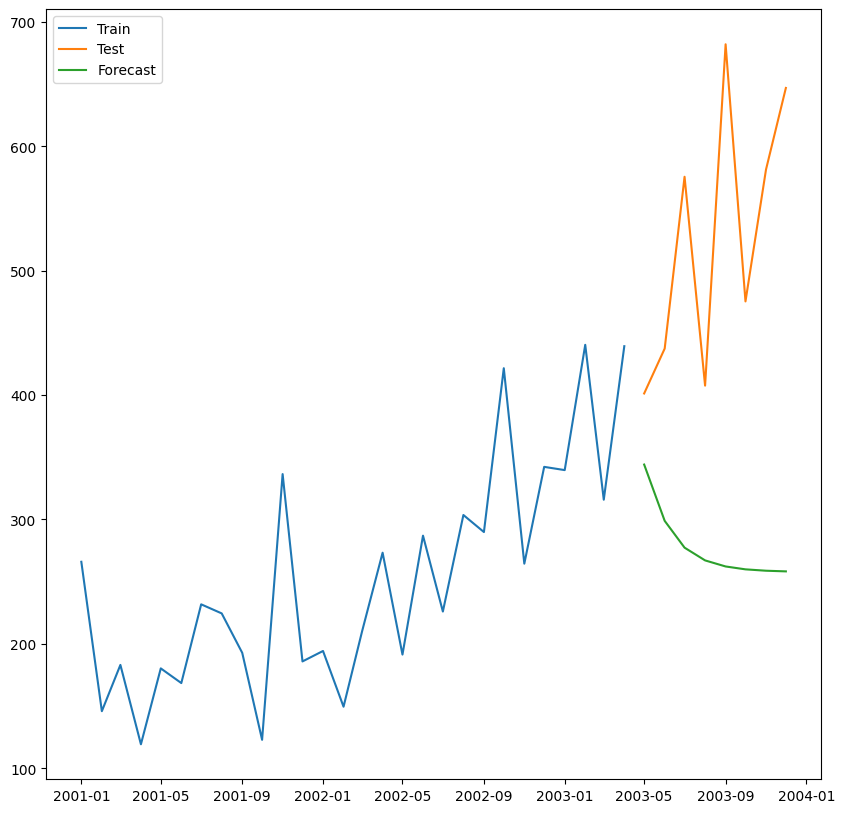

In [36]:
plot_res(train,test,fcast_m1)

### Custom ARIMA

In [37]:
def adj_arima(p,d,q):
    model = ARIMA(train,order=(p,d,q))
    arima = model.fit()
    fcast = arima.forecast(len(test))
    print("Forcasted values : \n",fcast)
    print(f"ARIMA({p,d,q})")
    eval_model(test,fcast) # MSE, RMSE, MAE
    plot_res(train,test,fcast)

## ARIMA(1, 1, 1)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    357.166160
2003-06-01    398.277184
2003-07-01    377.699596
2003-08-01    387.999440
2003-09-01    382.843987
2003-10-01    385.424482
2003-11-01    384.132849
2003-12-01    384.779359
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 1, 1))
MSE :  31017.70213095809
RMSE :  176.1184321158864
MAE :  143.62211792796188


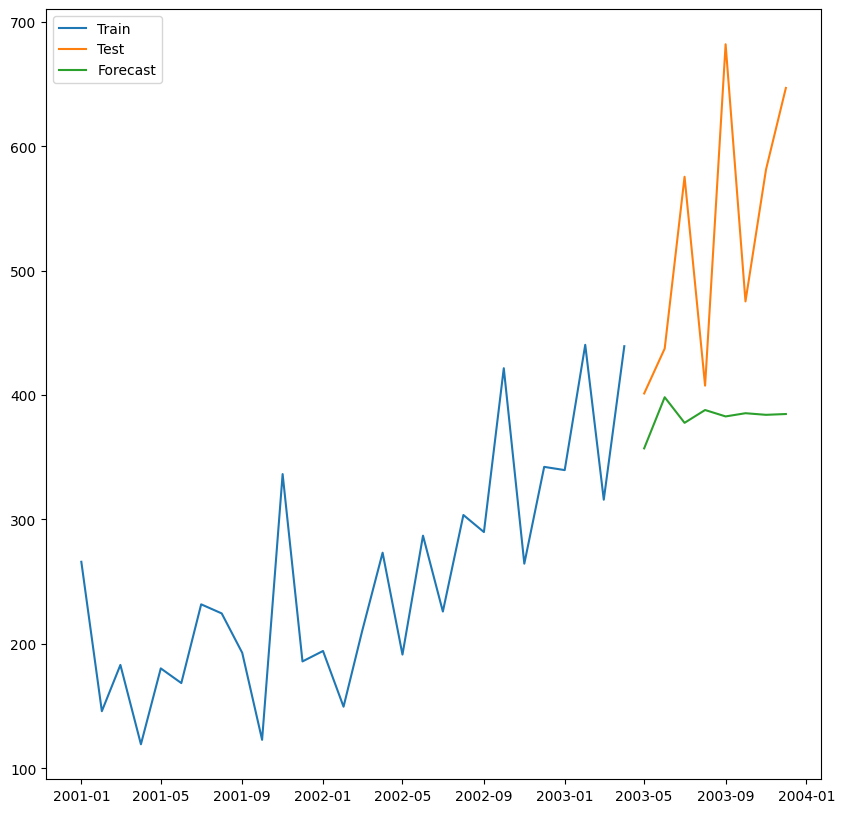

In [38]:
adj_arima(1,1,1)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    357.166160
2003-06-01    398.277184
2003-07-01    377.699596
2003-08-01    387.999440
2003-09-01    382.843987
2003-10-01    385.424482
2003-11-01    384.132849
2003-12-01    384.779359
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 1, 1))
MSE :  31017.70213095809
RMSE :  176.1184321158864
MAE :  143.62211792796188


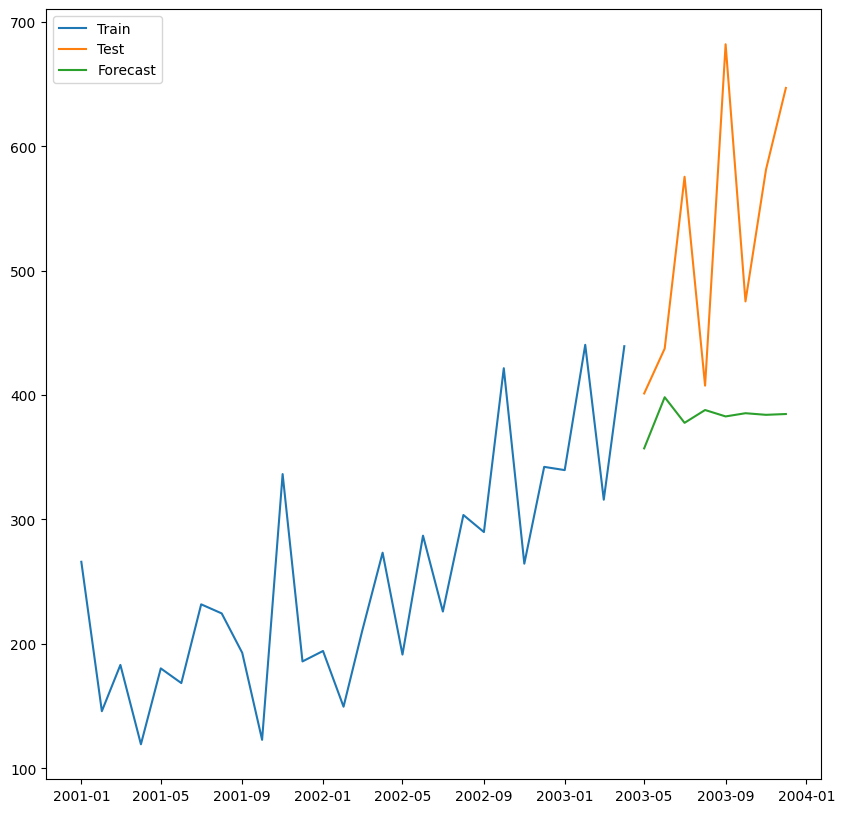

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    339.753099
2003-06-01    414.420497
2003-07-01    346.718693
2003-08-01    408.104712
2003-09-01    352.445290
2003-10-01    402.912339
2003-11-01    357.153275
2003-12-01    398.643554
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 1, 2))
MSE :  35297.06465550348
RMSE :  187.8751304869899
MAE :  148.51974548362486


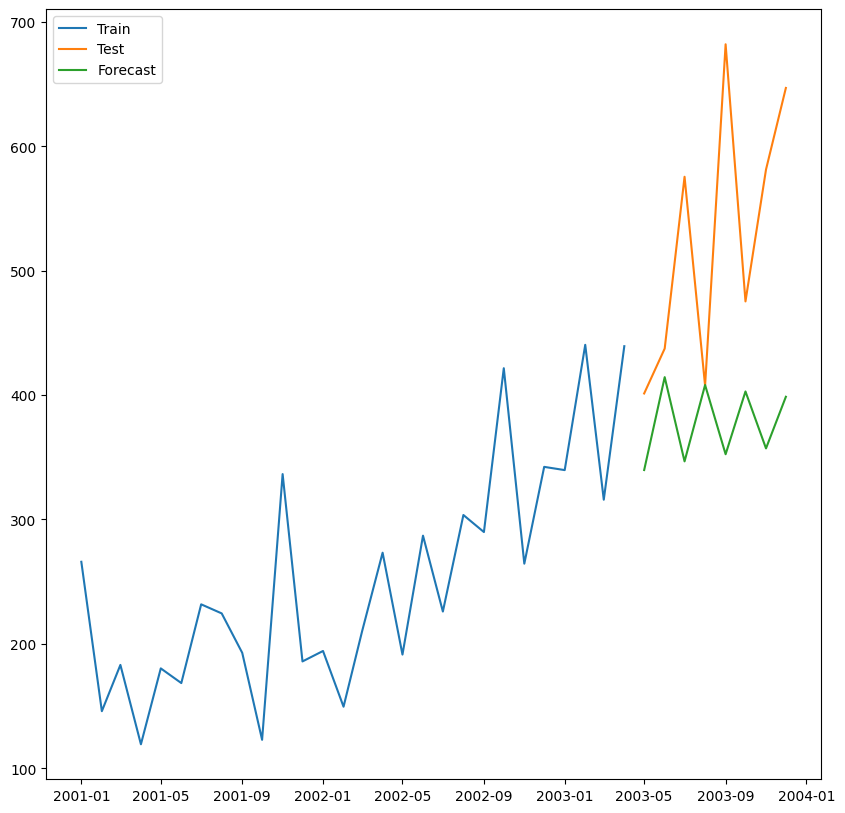

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    342.216387
2003-06-01    414.428059
2003-07-01    351.571443
2003-08-01    408.798926
2003-09-01    356.696458
2003-10-01    404.132882
2003-11-01    360.944634
2003-12-01    400.265152
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 1, 3))
MSE :  34304.55103866148
RMSE :  185.21487801648516
MAE :  146.33048891189864


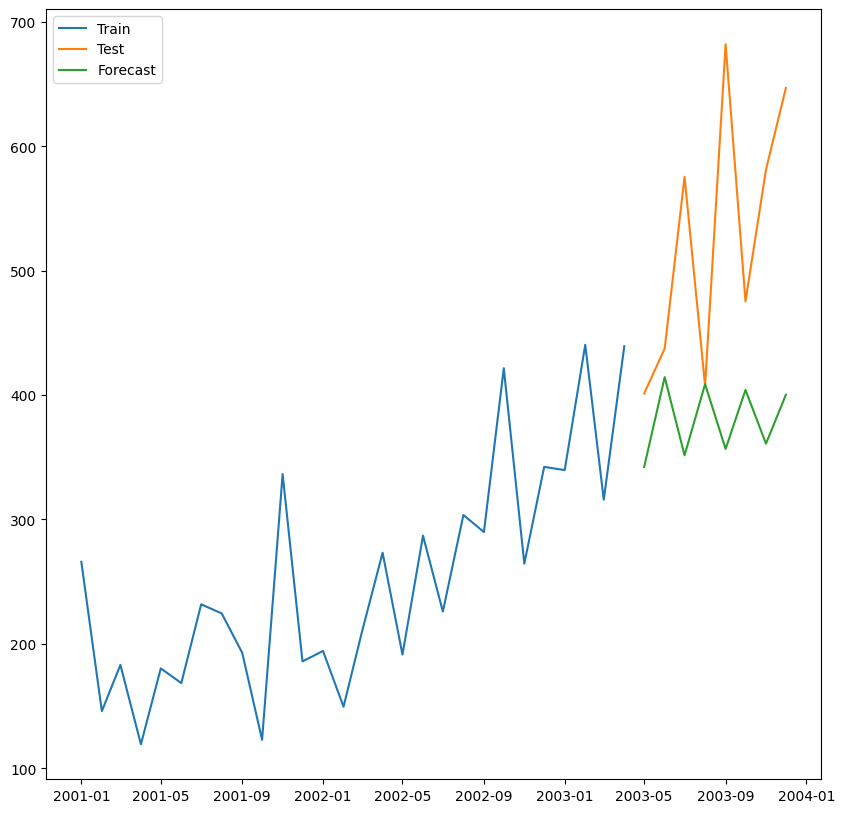

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    363.456827
2003-06-01    428.237502
2003-07-01    393.767265
2003-08-01    429.347334
2003-09-01    415.486594
2003-10-01    436.520685
2003-11-01    432.926352
2003-12-01    446.714515
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 2, 1))
MSE :  21204.7486615315
RMSE :  145.61850384319808
MAE :  113.04219924468777


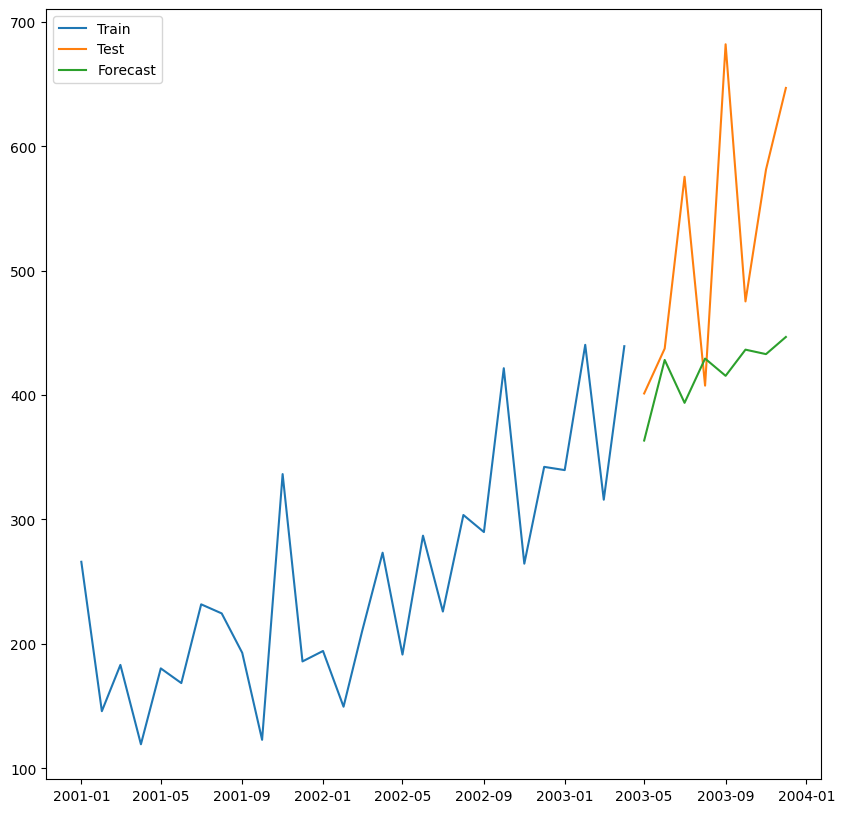

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    408.744981
2003-06-01    441.315108
2003-07-01    451.973341
2003-08-01    470.237594
2003-09-01    485.861658
2003-10-01    502.402180
2003-11-01    518.624583
2003-12-01    534.957410
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 2, 2))
MSE :  9364.648501157288
RMSE :  96.77111398117357
MAE :  74.42285876187628


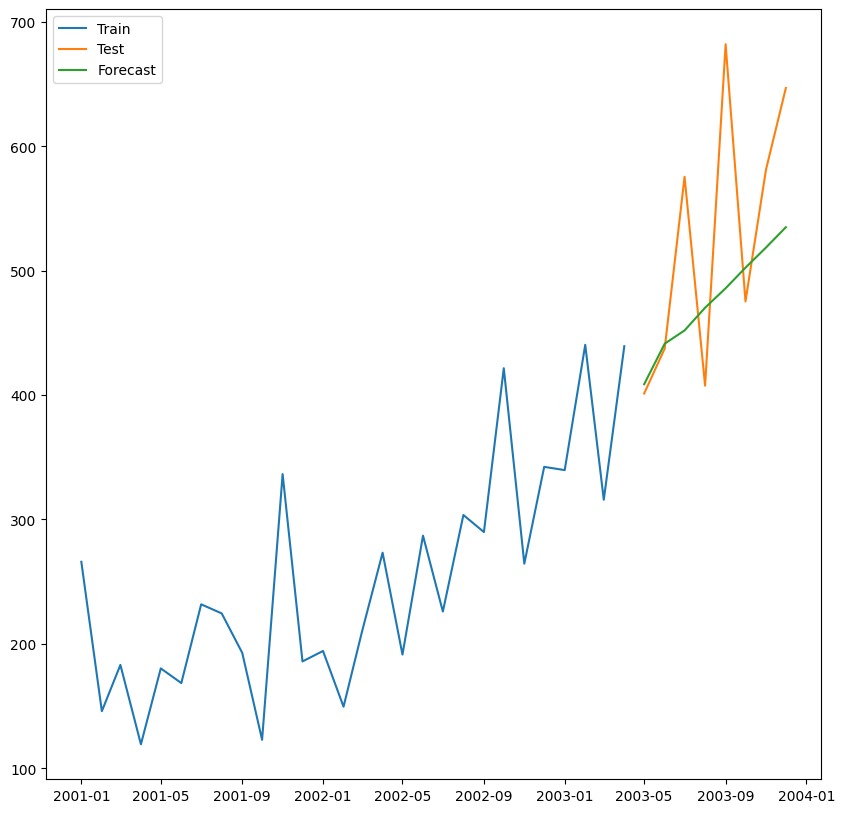

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    393.916743
2003-06-01    470.729397
2003-07-01    435.421299
2003-08-01    501.531251
2003-09-01    475.904208
2003-10-01    533.257229
2003-11-01    515.551207
2003-12-01    565.739323
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 2, 3))
MSE :  10794.369850359699
RMSE :  103.89595685280395
MAE :  85.71063715399401


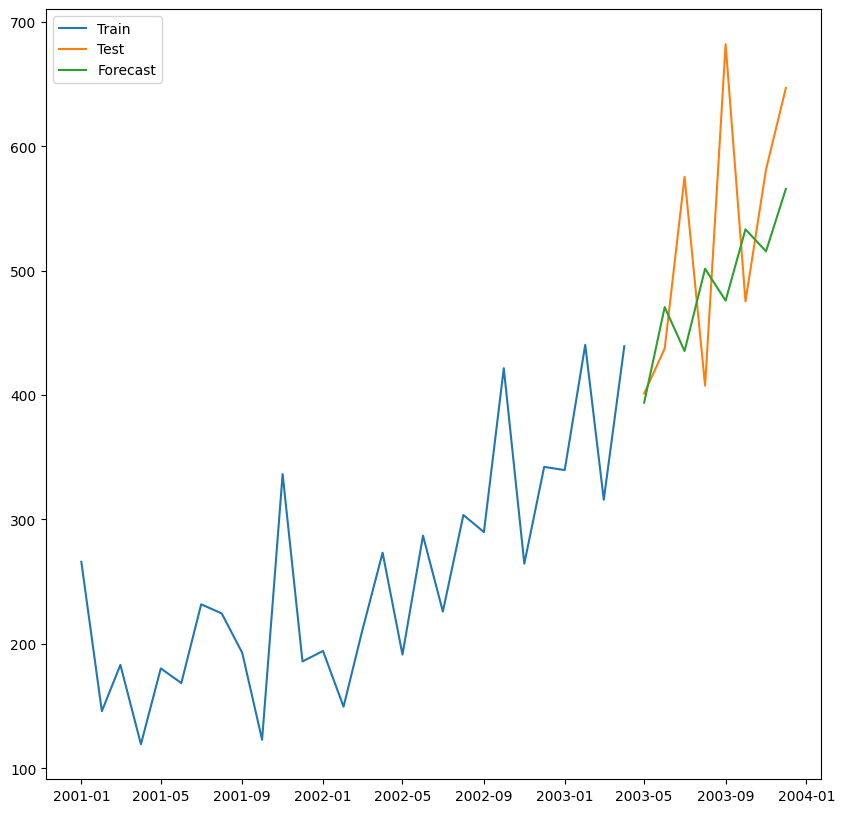

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    360.715223
2003-06-01    454.376914
2003-07-01    408.985310
2003-08-01    483.491377
2003-09-01    462.489865
2003-10-01    525.163044
2003-11-01    522.460296
2003-12-01    578.367586
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 3, 1))
MSE :  11781.47595957065
RMSE :  108.54250761600566
MAE :  87.08913177710562


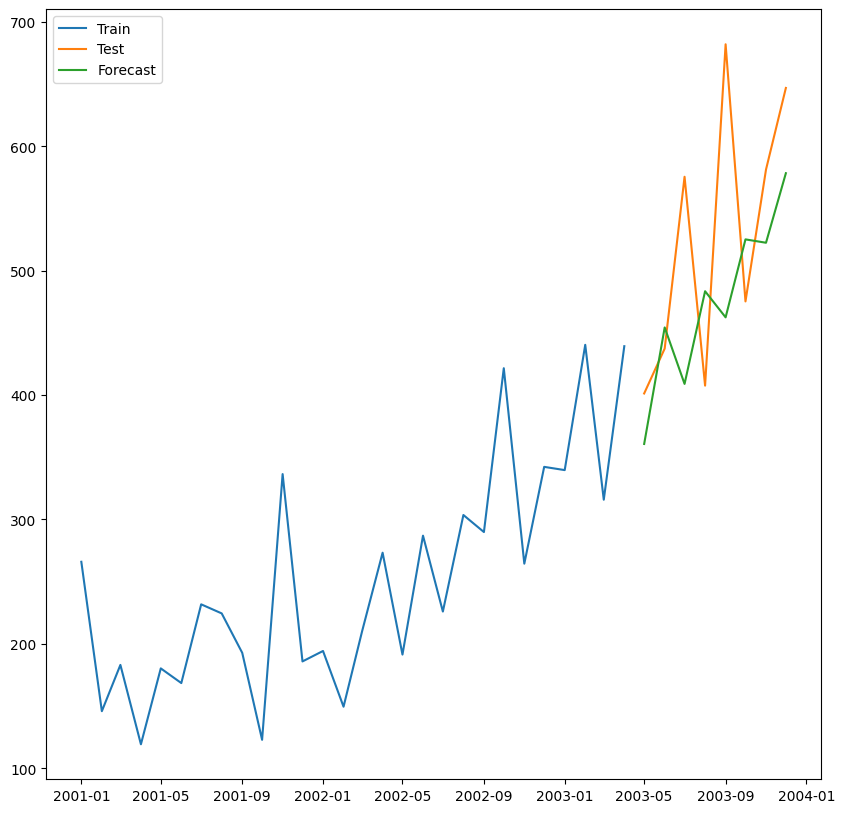

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    384.180121
2003-06-01    451.743890
2003-07-01    434.474199
2003-08-01    475.341984
2003-09-01    475.846023
2003-10-01    503.849695
2003-11-01    512.597864
2003-12-01    534.302935
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 3, 2))
MSE :  10711.09002146939
RMSE :  103.4943960872732
MAE :  82.02930345780953


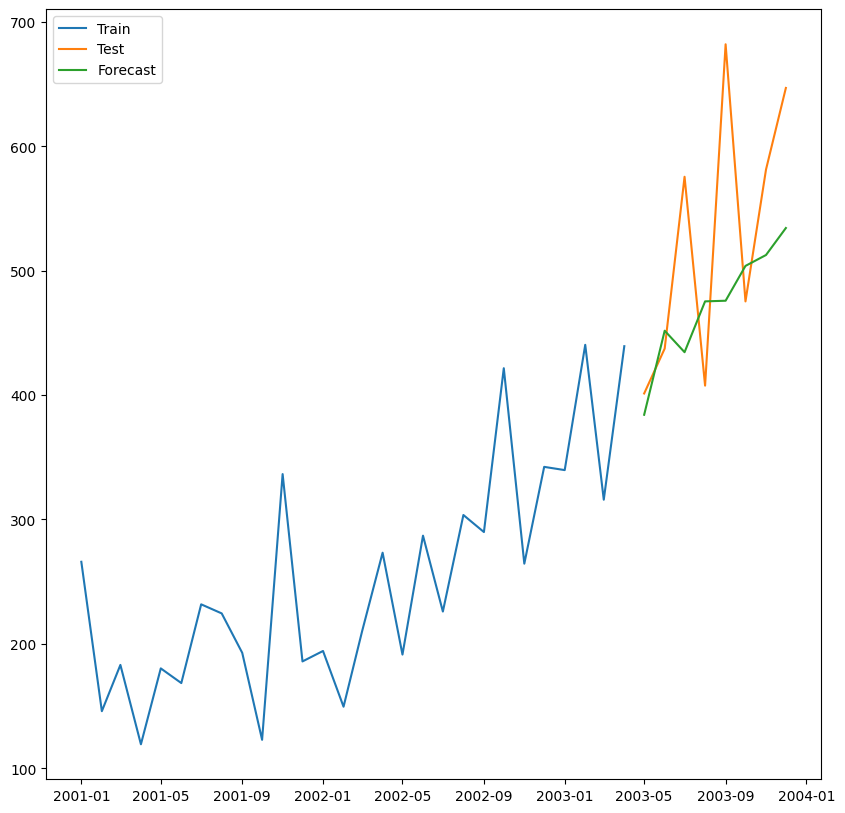

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    428.033095
2003-06-01    460.187019
2003-07-01    479.020489
2003-08-01    503.470454
2003-09-01    527.216859
2003-10-01    552.368971
2003-11-01    578.222841
2003-12-01    605.013405
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 3, 3))
MSE :  6424.343703170362
RMSE :  80.15200373771302
MAE :  64.83574338056272


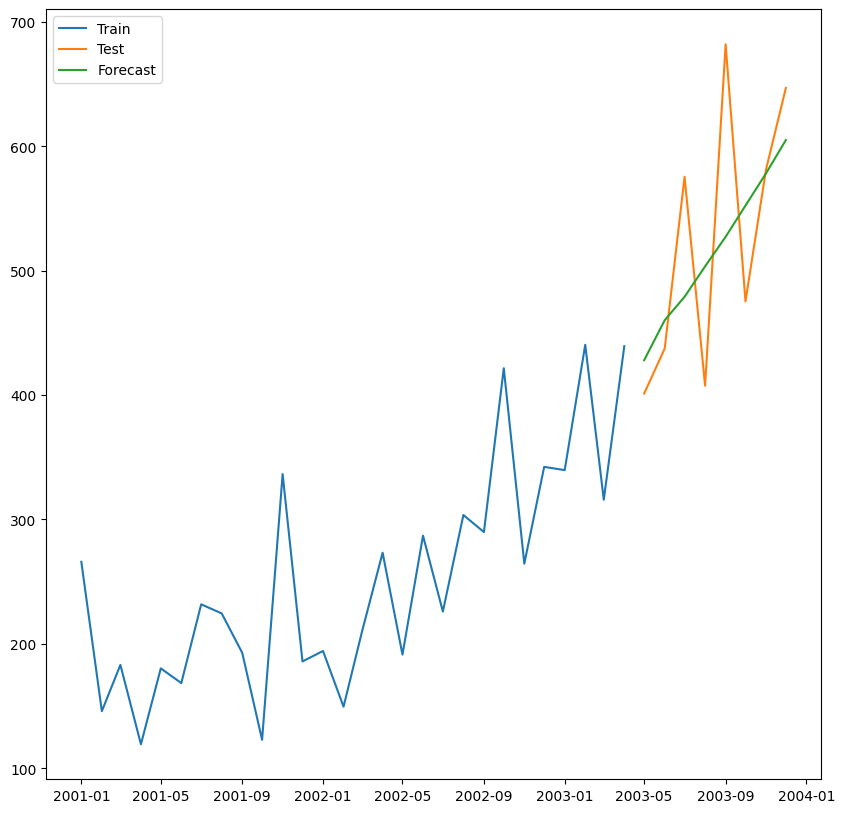

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    352.369772
2003-06-01    400.878749
2003-07-01    371.611374
2003-08-01    388.790288
2003-09-01    378.610241
2003-10-01    384.622804
2003-11-01    381.067539
2003-12-01    383.168942
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 1, 1))
MSE :  31945.894350702558
RMSE :  178.73414433370743
MAE :  145.77253630249942


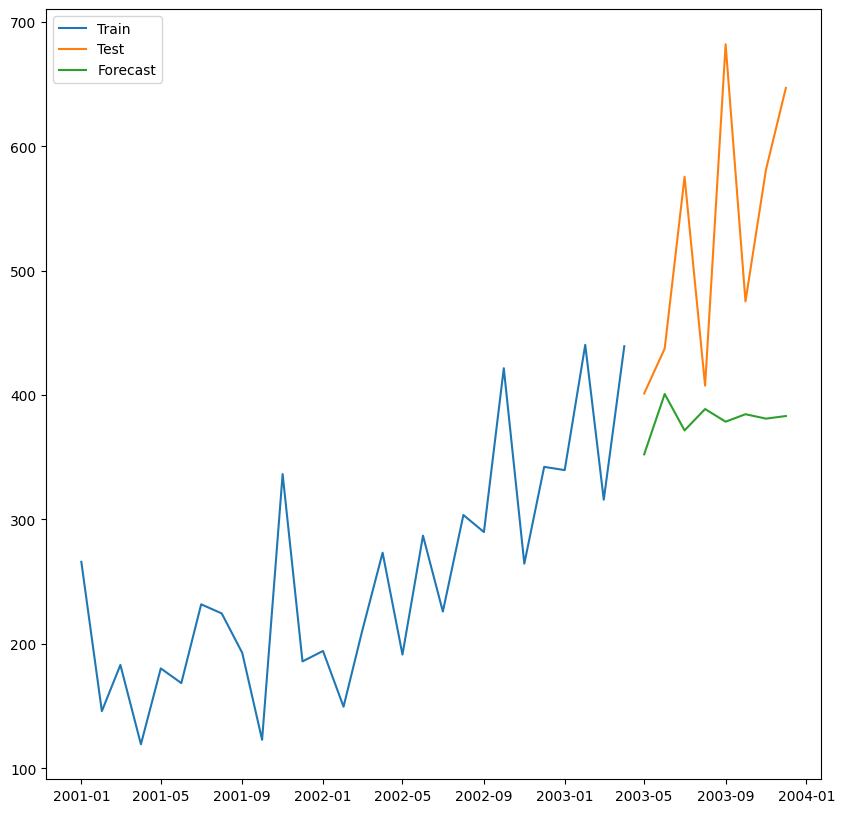

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    340.167037
2003-06-01    414.393029
2003-07-01    347.662555
2003-08-01    408.227880
2003-09-01    353.233557
2003-10-01    403.170359
2003-11-01    357.825922
2003-12-01    399.000326
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 1, 2))
MSE :  35107.72831882026
RMSE :  187.37056417383243
MAE :  148.10938693054536


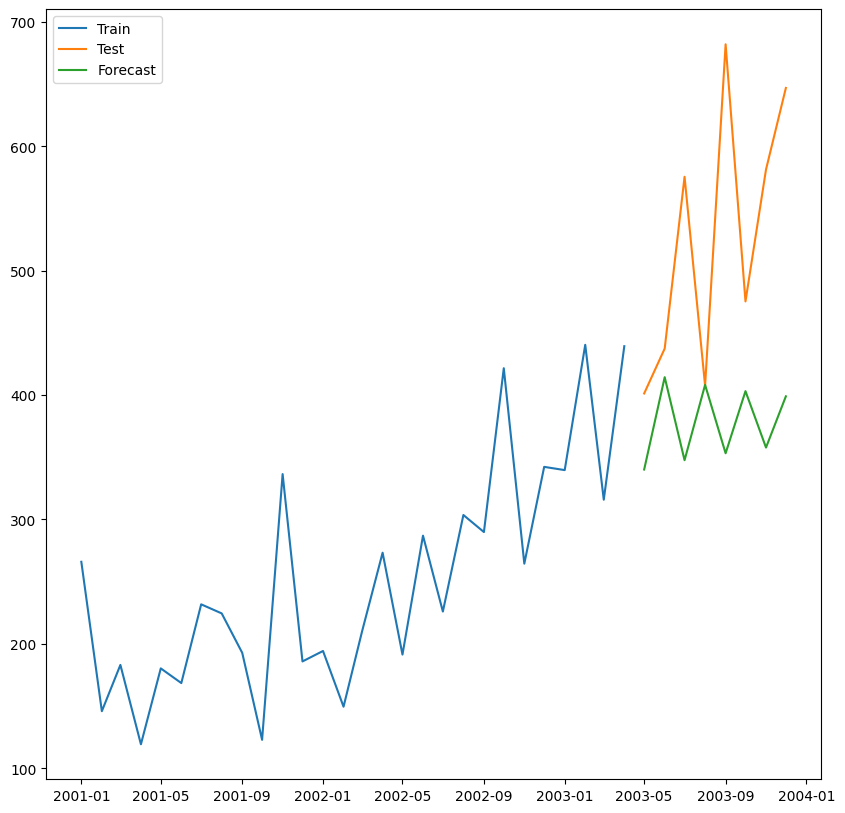

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    375.000821
2003-06-01    451.278847
2003-07-01    405.381713
2003-08-01    468.783478
2003-09-01    431.572507
2003-10-01    484.296221
2003-11-01    454.162170
2003-12-01    498.027457
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 1, 3))
MSE :  16836.230203827214
RMSE :  129.75449974404438
MAE :  100.86423457885586


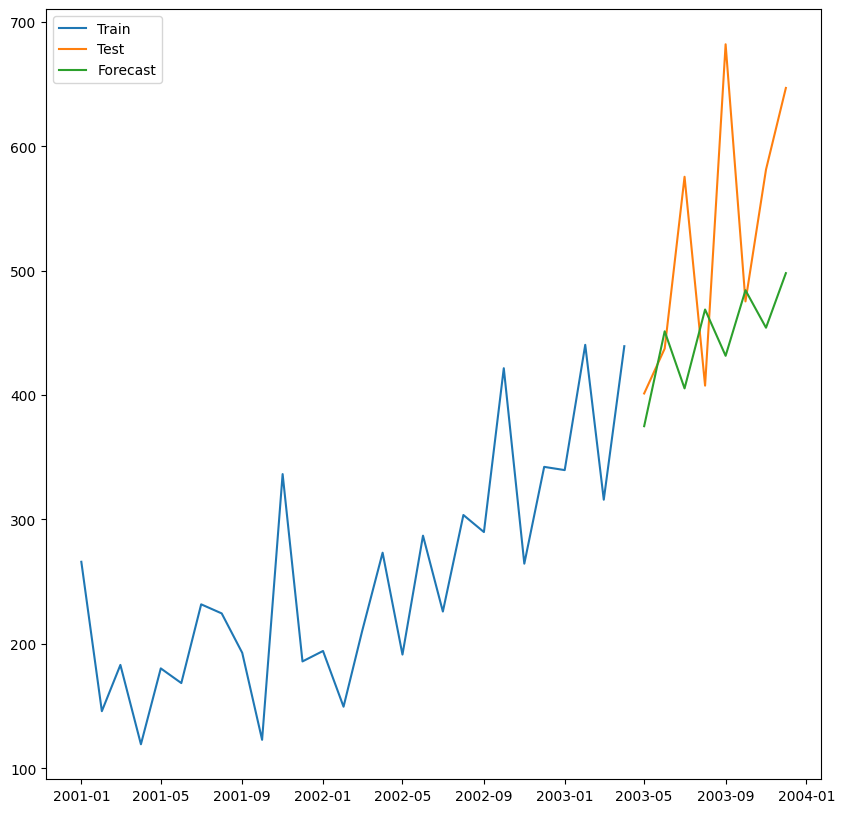

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    370.265984
2003-06-01    422.639069
2003-07-01    402.986825
2003-08-01    425.144972
2003-09-01    423.228859
2003-10-01    435.131675
2003-11-01    439.111710
2003-12-01    447.632008
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 2, 1))
MSE :  19968.85718187441
RMSE :  141.31120685166627
MAE :  109.53110543534457


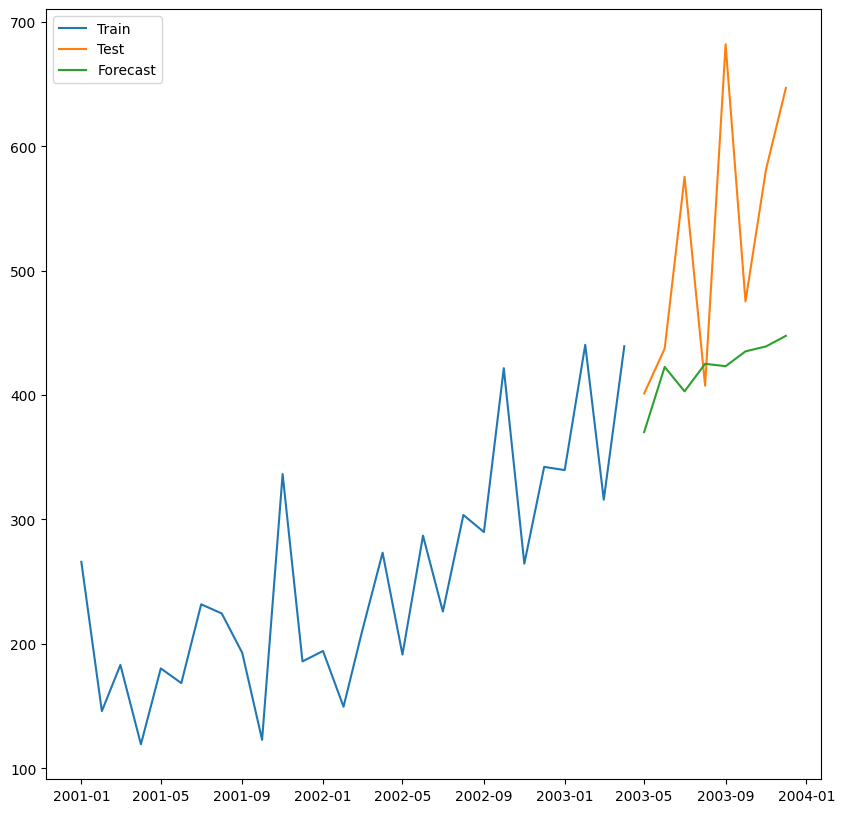

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    356.943543
2003-06-01    435.638123
2003-07-01    380.908671
2003-08-01    440.508966
2003-09-01    400.295153
2003-10-01    448.091310
2003-11-01    417.884578
2003-12-01    456.994887
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 2, 2))
MSE :  22973.233803523624
RMSE :  151.56923765567873
MAE :  116.98158761959407


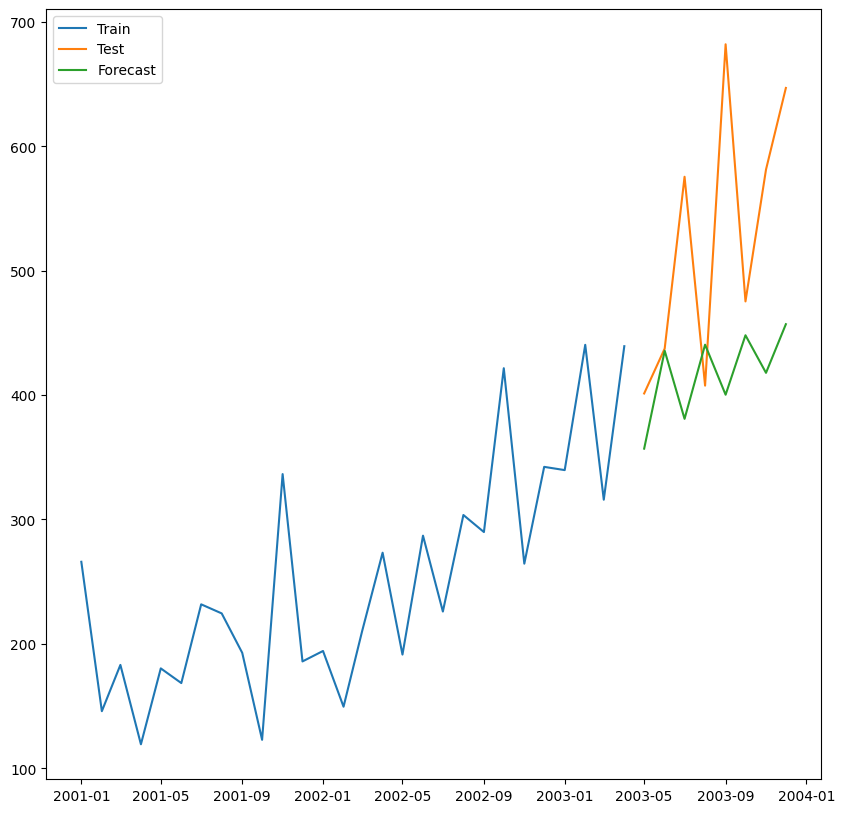

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    396.024522
2003-06-01    479.526317
2003-07-01    443.494016
2003-08-01    514.002996
2003-09-01    488.561178
2003-10-01    549.364156
2003-11-01    532.618225
2003-12-01    585.597336
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 2, 3))
MSE :  9947.70541459567
RMSE :  99.73818433576817
MAE :  82.91227397311806


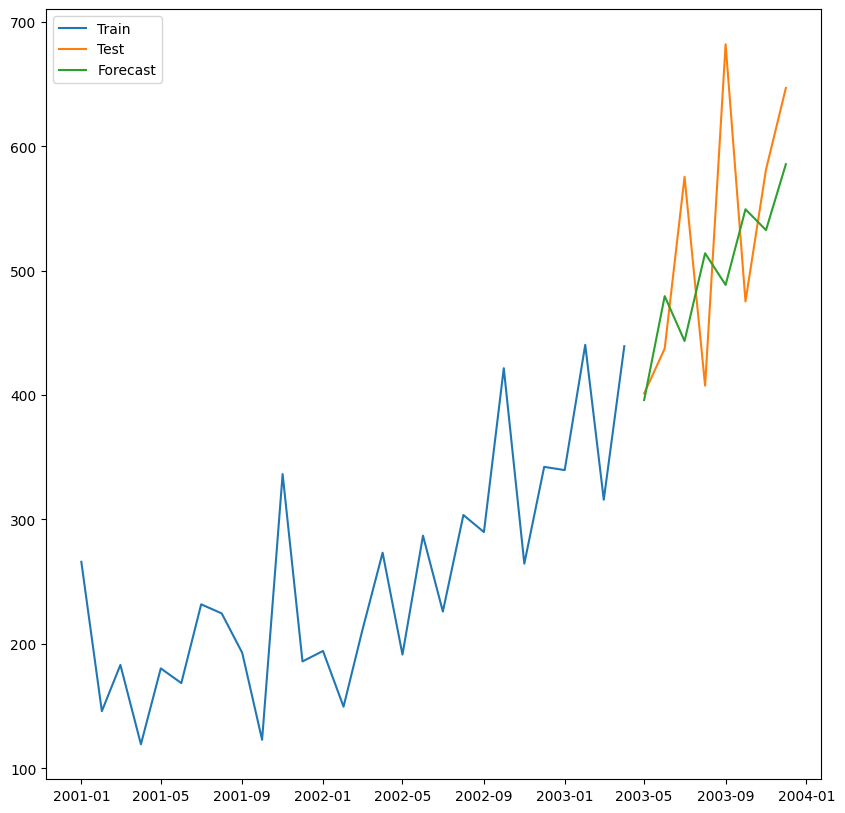

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    368.599516
2003-06-01    437.844561
2003-07-01    418.723631
2003-08-01    458.145947
2003-09-01    465.403206
2003-10-01    494.804478
2003-11-01    514.620168
2003-12-01    543.012431
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 3, 1))
MSE :  11342.08306403668
RMSE :  106.49921626019922
MAE :  80.8920041868985


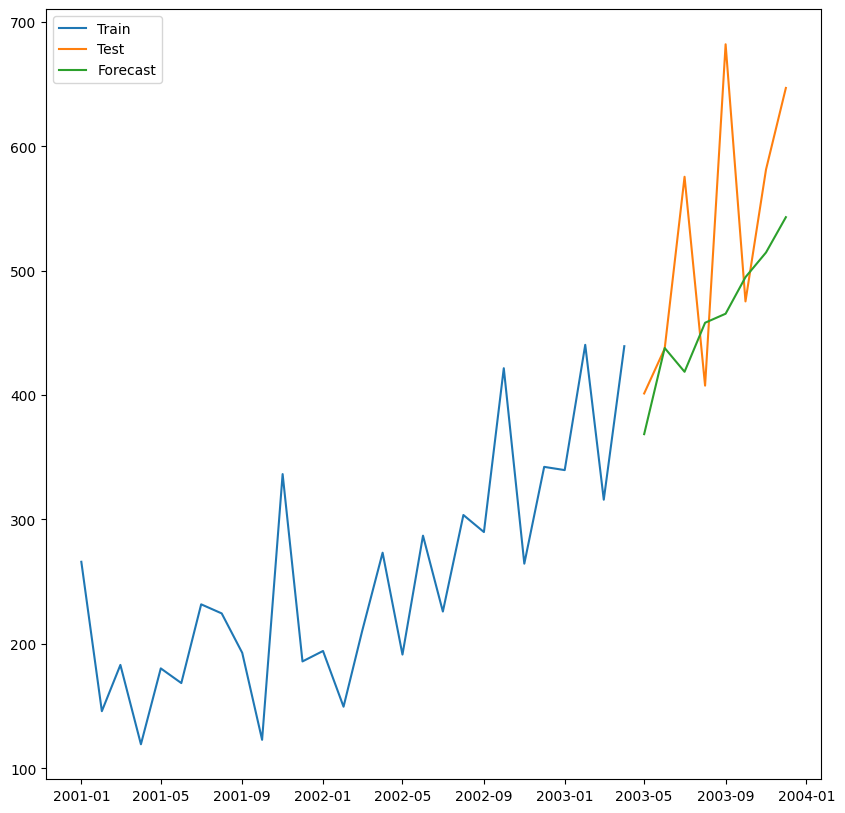

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    392.566502
2003-06-01    448.941866
2003-07-01    444.912899
2003-08-01    475.823474
2003-09-01    486.533376
2003-10-01    508.847260
2003-11-01    524.436202
2003-12-01    543.860117
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 3, 2))
MSE :  9387.531343934625
RMSE :  96.88927362682942
MAE :  76.00043795777347


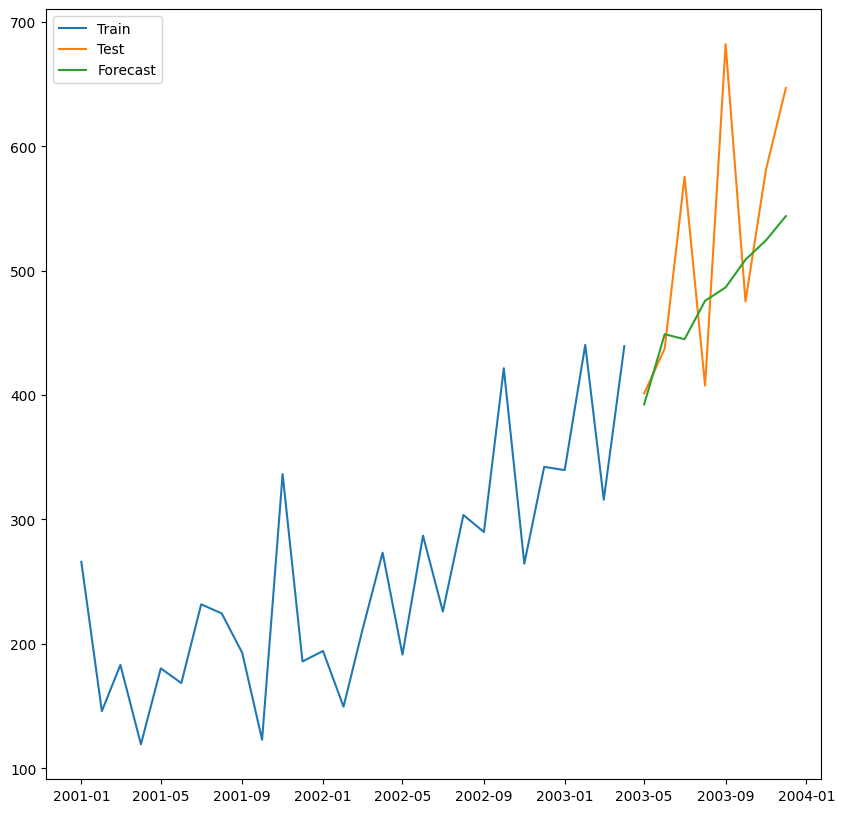

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    387.681660
2003-06-01    448.832312
2003-07-01    441.229096
2003-08-01    470.598955
2003-09-01    484.893110
2003-10-01    498.516113
2003-11-01    523.104657
2003-12-01    529.357852
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 3, 3))
MSE :  9863.333689727755
RMSE :  99.31431764719403
MAE :  77.29762567584376


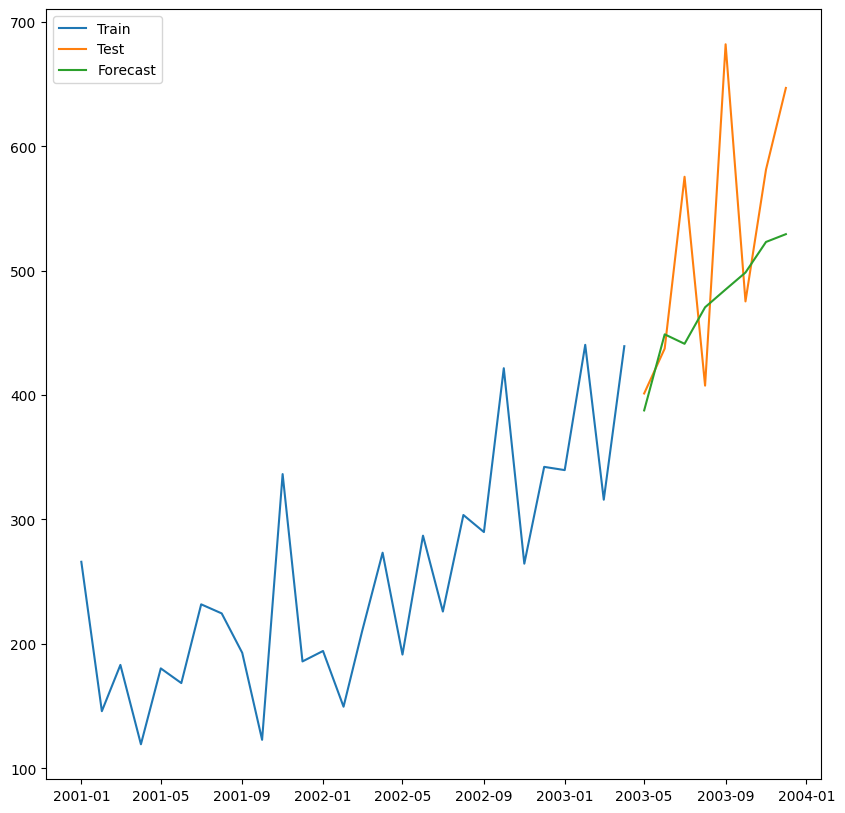

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    348.363550
2003-06-01    423.628610
2003-07-01    347.829548
2003-08-01    417.912868
2003-09-01    359.584917
2003-10-01    410.341848
2003-11-01    363.259098
2003-12-01    405.716135
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 1, 1))
MSE :  33601.8309739104
RMSE :  183.30802212099283
MAE :  143.91114518403262


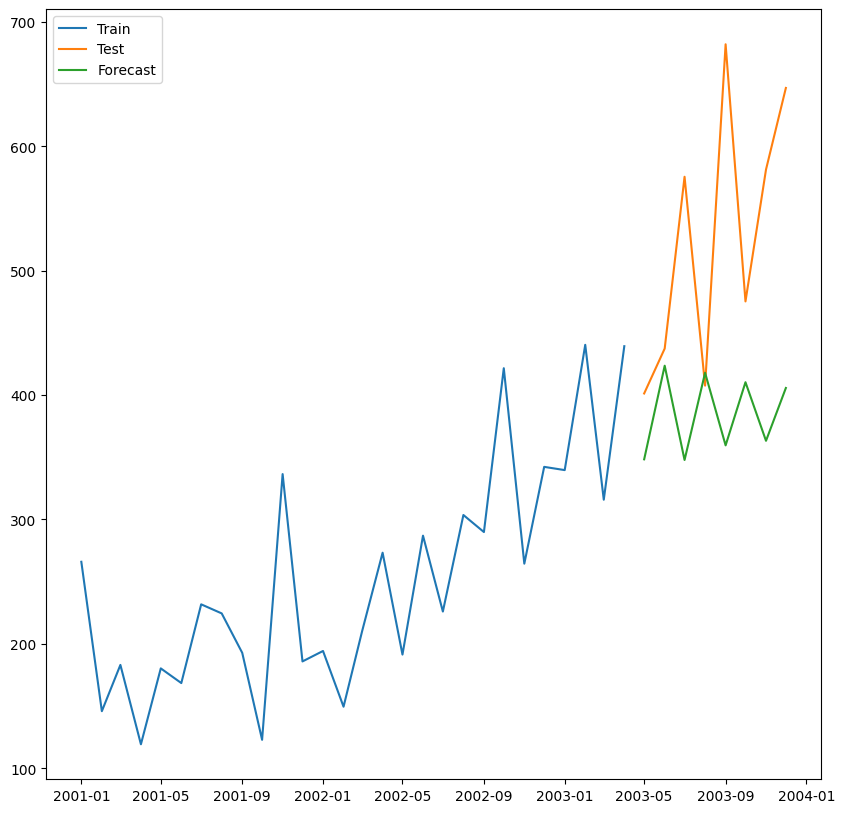

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    310.416511
2003-06-01    433.434450
2003-07-01    375.803120
2003-08-01    425.398485
2003-09-01    352.913654
2003-10-01    387.830818
2003-11-01    377.003336
2003-12-01    415.212630
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 1, 2))
MSE :  32479.501186183574
RMSE :  180.22070132530163
MAE :  145.61049585375366


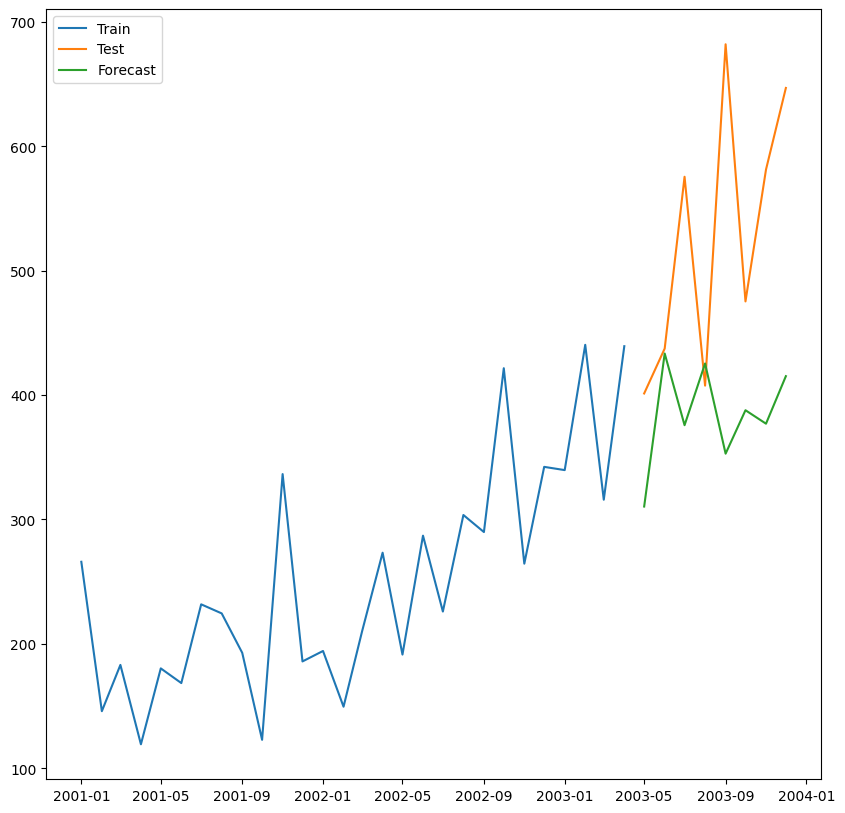

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    318.306701
2003-06-01    443.677256
2003-07-01    373.874298
2003-08-01    439.950060
2003-09-01    352.366614
2003-10-01    409.067218
2003-11-01    373.323736
2003-12-01    428.095822
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 1, 3))
MSE :  31600.135915625502
RMSE :  177.7642706384652
MAE :  143.23661598530344


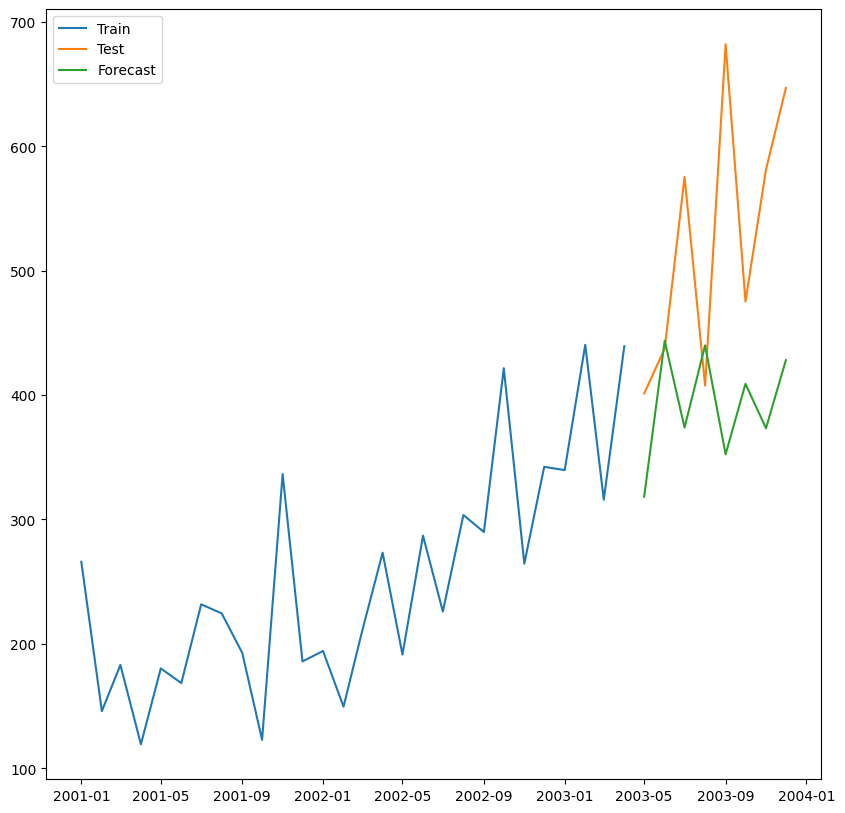

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    380.365264
2003-06-01    460.329596
2003-07-01    391.748473
2003-08-01    473.209983
2003-09-01    431.063320
2003-10-01    491.681020
2003-11-01    452.675948
2003-12-01    509.262828
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 2, 1))
MSE :  17219.87703145222
RMSE :  131.22452907689257
MAE :  103.35059593539692


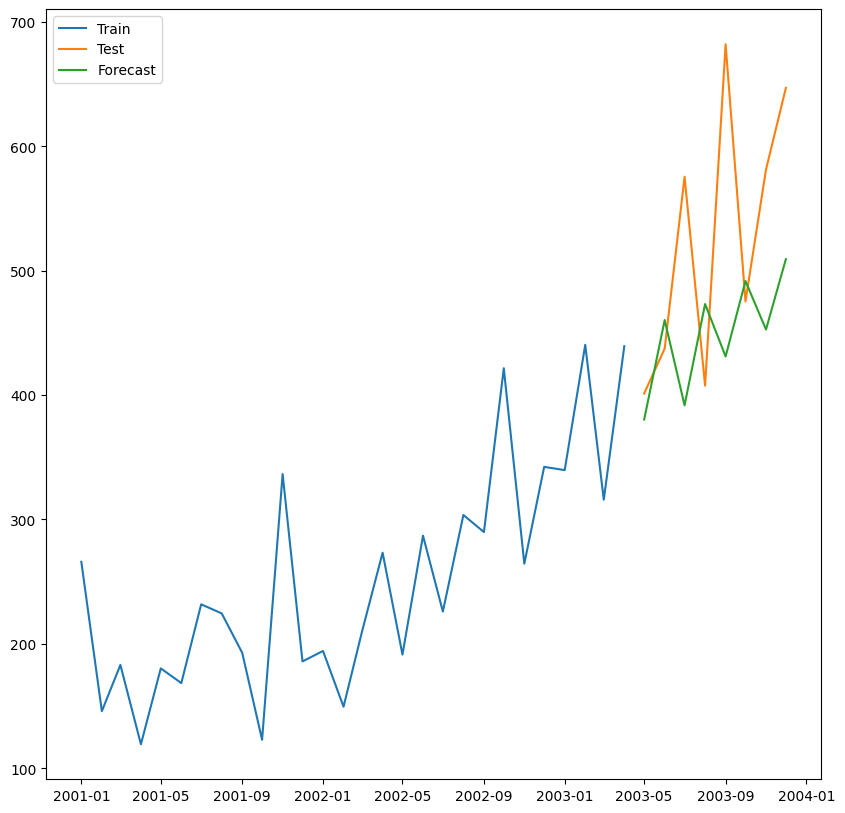

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    377.545124
2003-06-01    465.332382
2003-07-01    402.415962
2003-08-01    474.628445
2003-09-01    440.607363
2003-10-01    499.639642
2003-11-01    470.658517
2003-12-01    517.317255
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 2, 2))
MSE :  15461.432245935923
RMSE :  124.34400768004835
MAE :  99.7195311420176


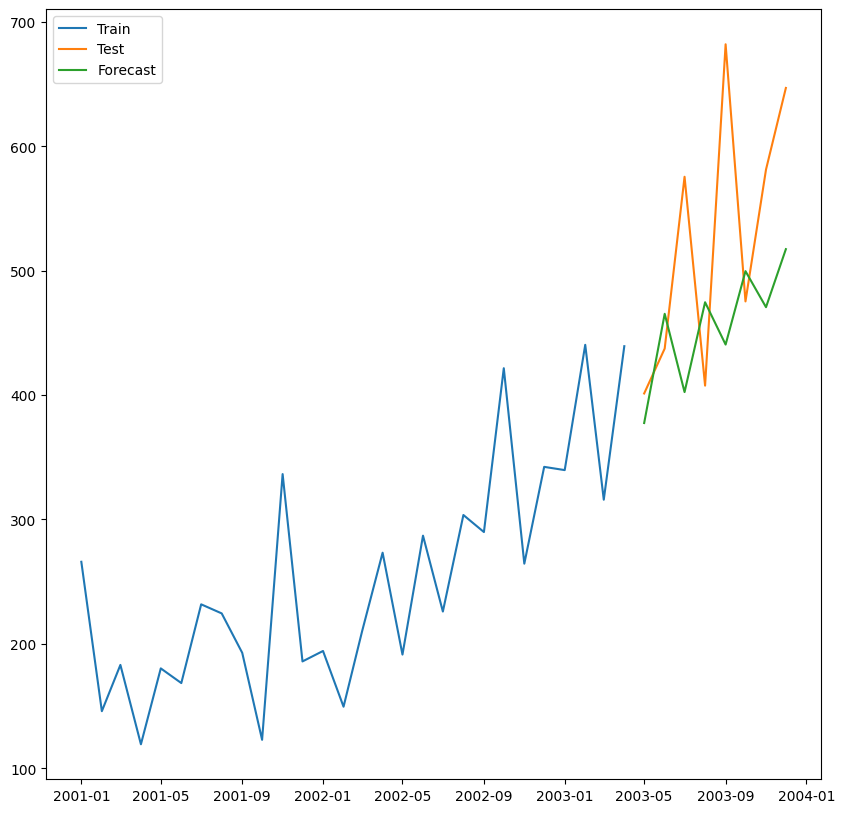

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    325.935057
2003-06-01    460.912773
2003-07-01    407.093453
2003-08-01    471.225529
2003-09-01    402.840577
2003-10-01    459.352479
2003-11-01    451.999435
2003-12-01    504.727406
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 2, 3))
MSE :  19219.71094966227
RMSE :  138.63517212331894
MAE :  112.18623689097089


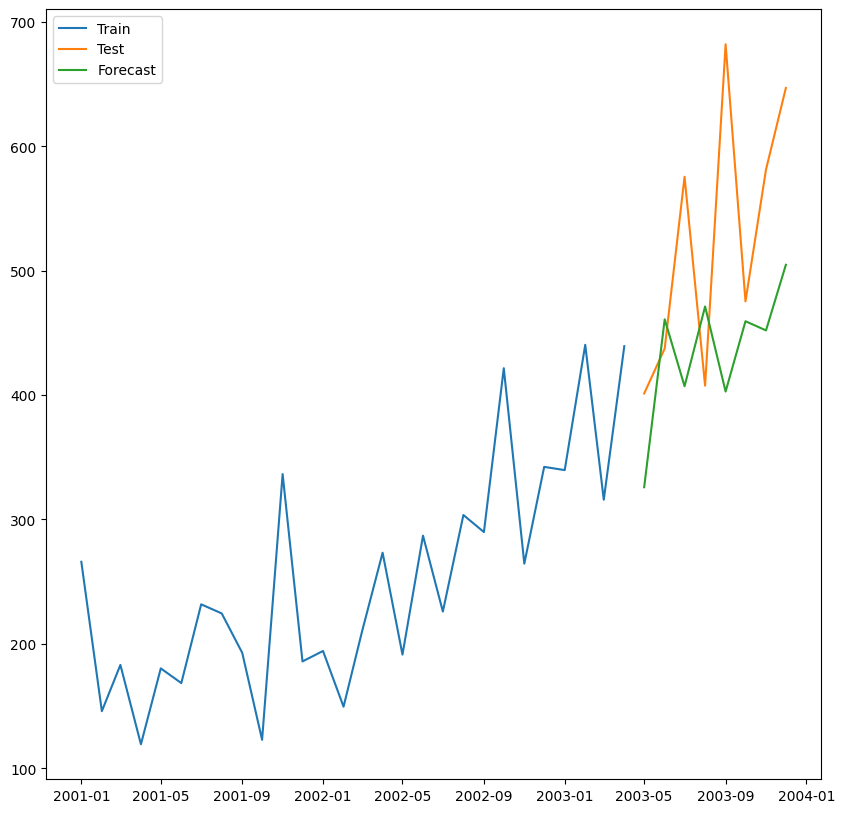

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    403.048639
2003-06-01    475.056091
2003-07-01    425.045149
2003-08-01    524.892302
2003-09-01    493.213519
2003-10-01    565.695271
2003-11-01    549.684943
2003-12-01    629.851261
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 3, 1))
MSE :  10364.624602878765
RMSE :  101.80680037639316
MAE :  79.37467876646332


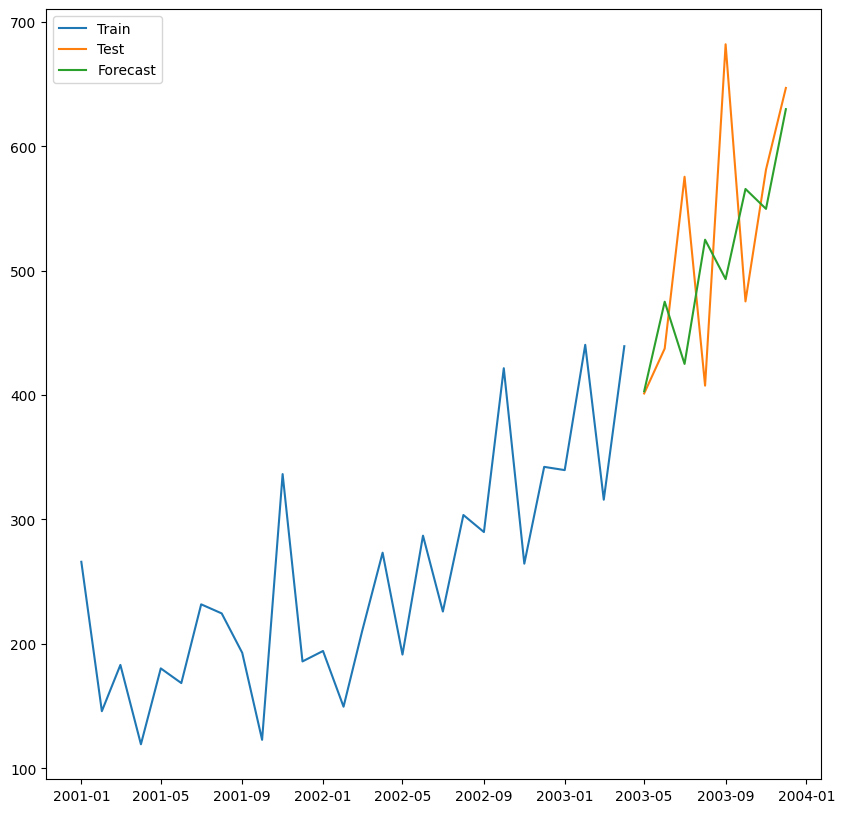

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    403.665571
2003-06-01    487.351899
2003-07-01    430.066573
2003-08-01    515.834918
2003-09-01    492.841034
2003-10-01    560.678845
2003-11-01    537.500343
2003-12-01    602.548029
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 3, 2))
MSE :  10290.329527892547
RMSE :  101.44126146639023
MAE :  83.58440676975252


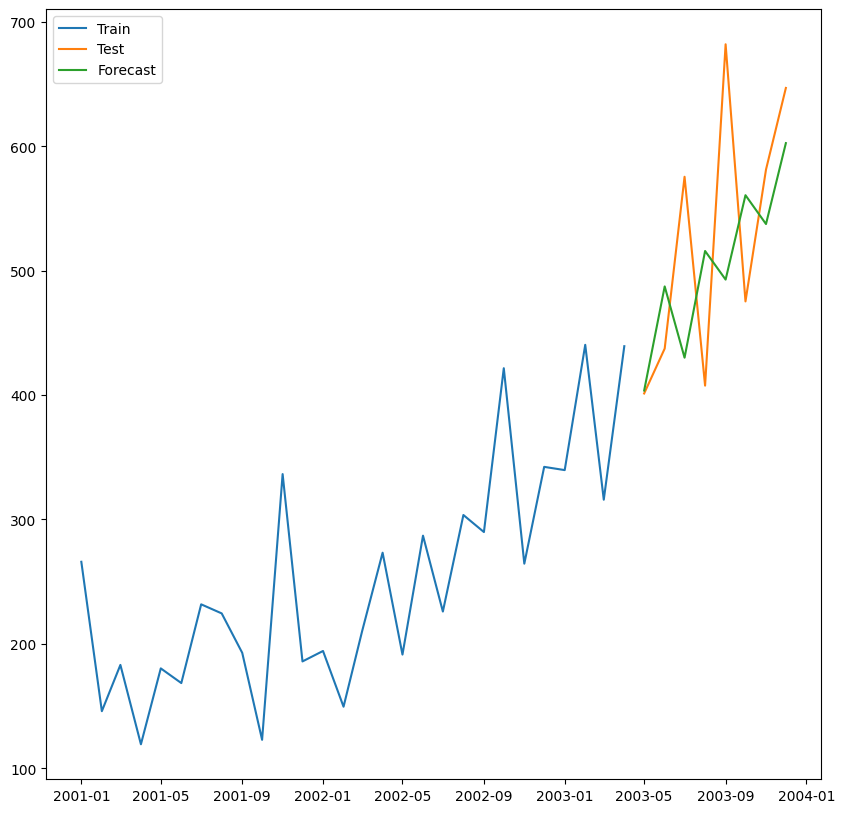

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    399.996156
2003-06-01    487.732626
2003-07-01    433.375190
2003-08-01    510.215581
2003-09-01    491.884919
2003-10-01    558.091724
2003-11-01    541.165394
2003-12-01    597.343151
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 3, 3))
MSE :  10041.171723219093
RMSE :  100.20564716231861
MAE :  82.37189008515142


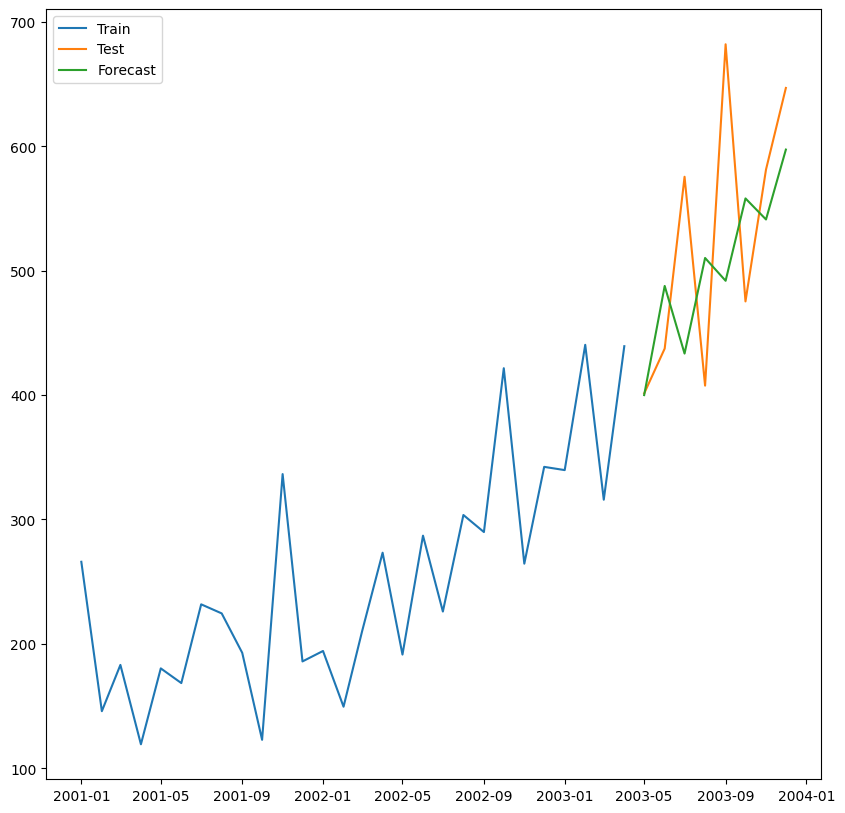

In [39]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            adj_arima(i,j,k)

## Insights
##### arima model gives minimum error with order of (1,3,3)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    428.033095
2003-06-01    460.187019
2003-07-01    479.020489
2003-08-01    503.470454
2003-09-01    527.216859
2003-10-01    552.368971
2003-11-01    578.222841
2003-12-01    605.013405
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 3, 3))
MSE :  6424.343703170362
RMSE :  80.15200373771302
MAE :  64.83574338056272


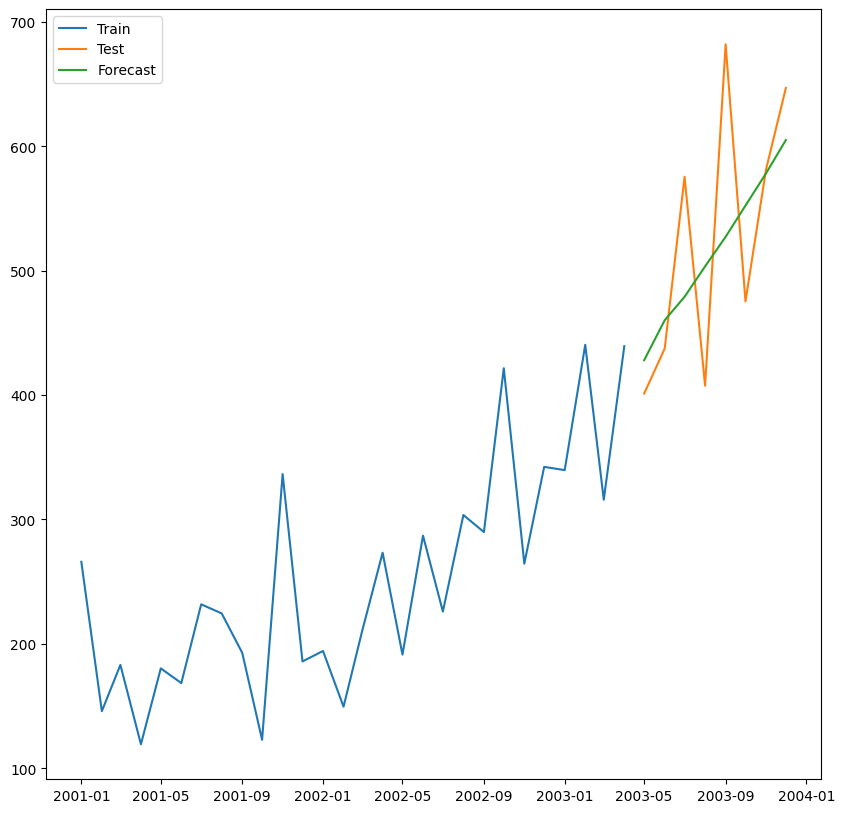

In [40]:
# we got minimum error with arima(1,3,3)
# adj_arima(2,4,3)
adj_arima(1,3,3)